In [1]:
import numpy as np
import seaborn as sns
import altair as alt
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import openai
import os
openai.api_key = ""

In [3]:
texts = ["I like to be in my house",
         "I enjoy staying home",
         "the isotope 238u decays to 206pb"]

To get the corresponding sentence embeddings, we call the Embed endpoint with co.embed(). We supply three parameters:

texts - our list of sentences
model - the model name
input_type - we use search_document to indicate that we intend to use the embeddings for search use-cases

In [4]:
response = openai.embeddings.create(
    input=texts,
    model='text-embedding-ada-002' # Or another appropriate OpenAI embedding model
)

# Extract the embeddings from the response
embeddings = [item.embedding for item in response.data]

In [5]:
# Extract the embeddings from the response
embeddings = [item.embedding for item in response.data]

[sentence1, sentence2, sentence3] = embeddings

print("Embedding for sentence 1", np.array(sentence1))
print("Embedding for sentence 2", np.array(sentence2))
print("Embedding for sentence 3", np.array(sentence3))

Embedding for sentence 1 [ 2.82697636e-03  8.56453087e-03 -1.64974034e-02 ... -1.15803853e-02
  9.56484801e-05 -2.87837591e-02]
Embedding for sentence 2 [ 0.00192339  0.00730098 -0.00814949 ... -0.01054937  0.00382779
 -0.03543475]
Embedding for sentence 3 [ 0.00018073  0.00974596  0.00837052 ... -0.00537076 -0.02347413
 -0.00467321]


In [6]:
print("Similarity between sentences 1 and 2:", np.dot(sentence1, sentence2))
print("Similarity between sentences 1 and 3:", np.dot(sentence1, sentence3))
print("Similarity between sentences 2 and 3:", np.dot(sentence2, sentence3))

Similarity between sentences 1 and 2: 0.9434670341493698
Similarity between sentences 1 and 3: 0.6768443167202791
Similarity between sentences 2 and 3: 0.6739775360169225


The similarity between sentences 1 and 2 (0.94) is much larger than the similarities between the other pairs. This confirms our predictions.



In [8]:
print("Similarity between sentences 1 and 1:", np.dot(sentence1, sentence1))
print("Similarity between sentences 2 and 2:", np.dot(sentence2, sentence2))
print("Similarity between sentences 3 and 3:", np.dot(sentence3, sentence3))

Similarity between sentences 1 and 1: 1.0000001025401895
Similarity between sentences 2 and 2: 0.9999999860274315
Similarity between sentences 3 and 3: 0.9999999489301806


Now let’s calculate the cosine similarities between them.



In [9]:
print("Cosine similarity between sentences 1 and 2:", cosine_similarity([sentence1], [sentence2])[0][0])
print("Cosine similarity between sentences 1 and 3:", cosine_similarity([sentence1], [sentence3])[0][0])
print("Cosine similarity between sentences 2 and 3:", cosine_similarity([sentence2], [sentence3])[0][0])

Cosine similarity between sentences 1 and 2: 0.9434669923690582
Cosine similarity between sentences 1 and 3: 0.676844299301568
Cosine similarity between sentences 2 and 3: 0.6739775579354772


In [10]:
print("Cosine similarity between sentences 1 and 1:", cosine_similarity([sentence1], [sentence1])[0][0])
print("Cosine similarity between sentences 2 and 2:", cosine_similarity([sentence2], [sentence2])[0][0])
print("Cosine similarity between sentences 3 and 3:", cosine_similarity([sentence3], [sentence3])[0][0])

Cosine similarity between sentences 1 and 1: 1.0000000000000002
Cosine similarity between sentences 2 and 2: 1.0000000000000004
Cosine similarity between sentences 3 and 3: 0.9999999999999991


In [11]:
import matplotlib.pyplot as plt

In [12]:
# Calculate cosine similarity for all pairs
similarity_matrix = cosine_similarity(embeddings)

# Create a list of sentence labels
sentence_labels = [f"Sentence {i+1}" for i in range(len(texts))]

# Create a pandas DataFrame for easier plotting
import pandas as pd
similarity_df = pd.DataFrame(similarity_matrix, index=sentence_labels, columns=sentence_labels)

display(similarity_df)

,Sentence 1,Sentence 2,Sentence 3
Sentence 1,1.000000,0.943467,0.676844
Sentence 2,0.943467,1.000000,0.673978
Sentence 3,0.676844,0.673978,1.000000


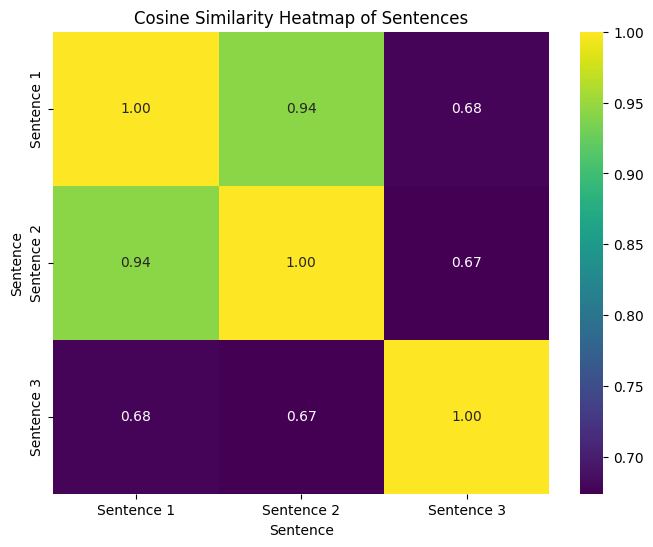

In [13]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Cosine Similarity Heatmap of Sentences')
plt.xlabel('Sentence')
plt.ylabel('Sentence')
plt.show()